# **Integrated Retail Analytics for Store Optimization**    


# **Project Summary -**


The objective of this project is to leverage retail sales, store, and external feature data to gain insights into sales performance and optimize store operations. The analysis focuses on integrating multiple datasets, exploring sales trends, and identifying key factors that influence weekly sales. In addition, predictive modeling is applied for sales forecasting and anomaly detection, segmentation is used to classify stores based on performance characteristics, and market basket insights are explored to uncover cross-selling opportunities. Together, these steps provide a comprehensive framework for data-driven decision-making in retail store optimization.

# **GitHub Link -**

# **Problem Statement**


Retail businesses generate vast amounts of transactional, store, and external data, but leveraging this information effectively for decision-making remains a challenge. Variations in sales across stores and departments are influenced by multiple factors such as store size, location type, holidays, promotions, fuel prices, and macroeconomic conditions like CPI and unemployment. Without structured analysis, it is difficult for retailers to accurately forecast sales, detect anomalies, optimize inventory, or design targeted marketing strategies.

The key problem addressed in this project is:
How can integrated retail data be analyzed and modeled to uncover sales patterns, build accurate forecasting models, detect anomalies, segment stores for strategic planning, and identify cross-selling opportunities that support store optimization.

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Datasets**

In [2]:
sales_df = pd.read_csv('/content/drive/MyDrive/Labmentix/Project 5 - Integrated Retail Analytics for Store Optimization/sales data-set.csv')
features_df = pd.read_csv('/content/drive/MyDrive/Labmentix/Project 5 - Integrated Retail Analytics for Store Optimization/Features data set.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/Labmentix/Project 5 - Integrated Retail Analytics for Store Optimization/stores data-set.csv')


In [3]:
print('\nSales:')
print(sales_df.head())
print('\nFeatures:')
print(features_df.head())
print('\nStores:')
print(stores_df.head())


Sales:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

Features:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        

In [4]:
# Convert the 'Date' column to a datetime object
sales_df['Date'] = pd.to_datetime(sales_df['Date'] , dayfirst=True)
features_df['Date']= pd.to_datetime(features_df['Date'], dayfirst=True)


In [5]:
df_merged = pd.merge(sales_df, features_df, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [6]:
final_df = pd.merge(df_merged, stores_df, on = 'Store', how = 'left')

In [7]:
print("Initial Merged DataFrame:")
print(final_df.head())
print("\nDataFrame Info:")
print(final_df.info())

Initial Merged DataFrame:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1   

**Data Cleaning**

In [8]:
# Fill missing MarkDown values with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df[markdown_cols] = final_df[markdown_cols].fillna(0)

# Forward-fill missing CPI and Unemployment values within each store
final_df['CPI'] = final_df.groupby('Store')['CPI'].ffill()
final_df['Unemployment'] = final_df.groupby('Store')['Unemployment'].ffill()

# Drop any remaining rows with missing values
final_df.dropna(inplace=True)

In [9]:
print(final_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


**Exploratory Data Analysis (EDA)**

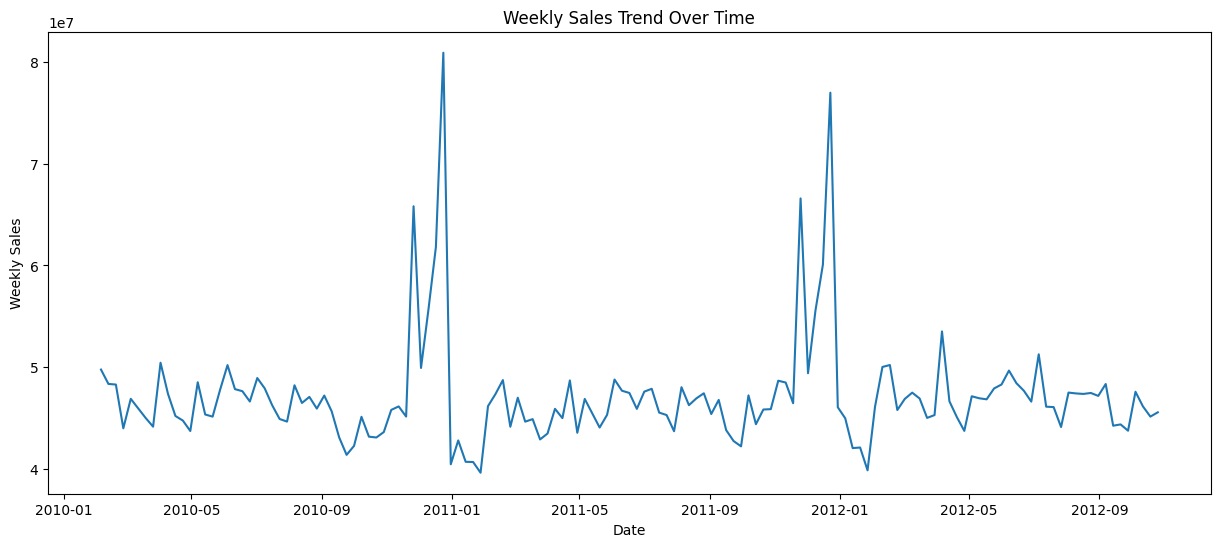

In [10]:
# Aggregate sales by date to see the overall trend
weekly_sales_trend = final_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x = 'Date', y = 'Weekly_Sales', data = weekly_sales_trend)
plt.title('Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.savefig('weekly_sales_trend.png')
plt.show()

/tmp/ipython-input-1678681193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Type' , y = 'Weekly_Sales', data = sales_by_type, palette='viridis')


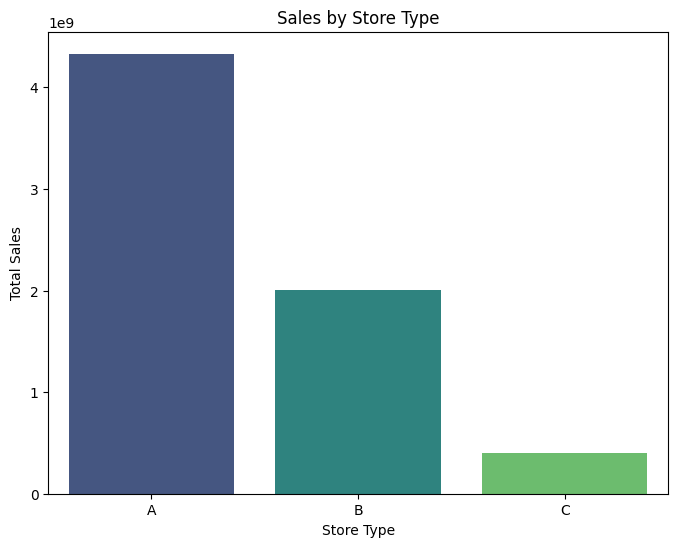

In [11]:
# Analyze sales by store type
sales_by_type = final_df.groupby('Type')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Type' , y = 'Weekly_Sales', data = sales_by_type, palette='viridis')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.savefig('sales_by_type.png')
plt.show()

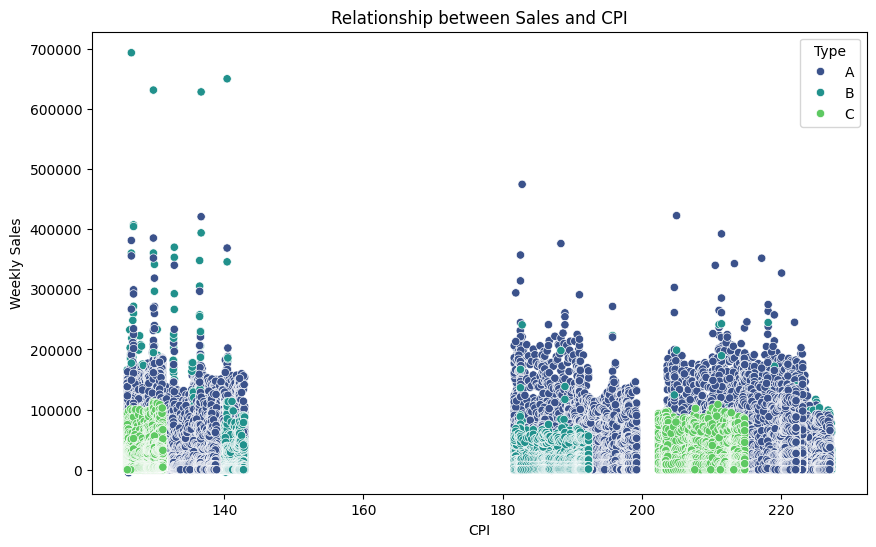

In [12]:
# Relationship between sales and CPI
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'CPI', y ='Weekly_Sales', data = final_df, hue = 'Type', palette = 'viridis')
plt.title('Relationship between Sales and CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.savefig('sales_cpi_relationship.png')
plt.show()

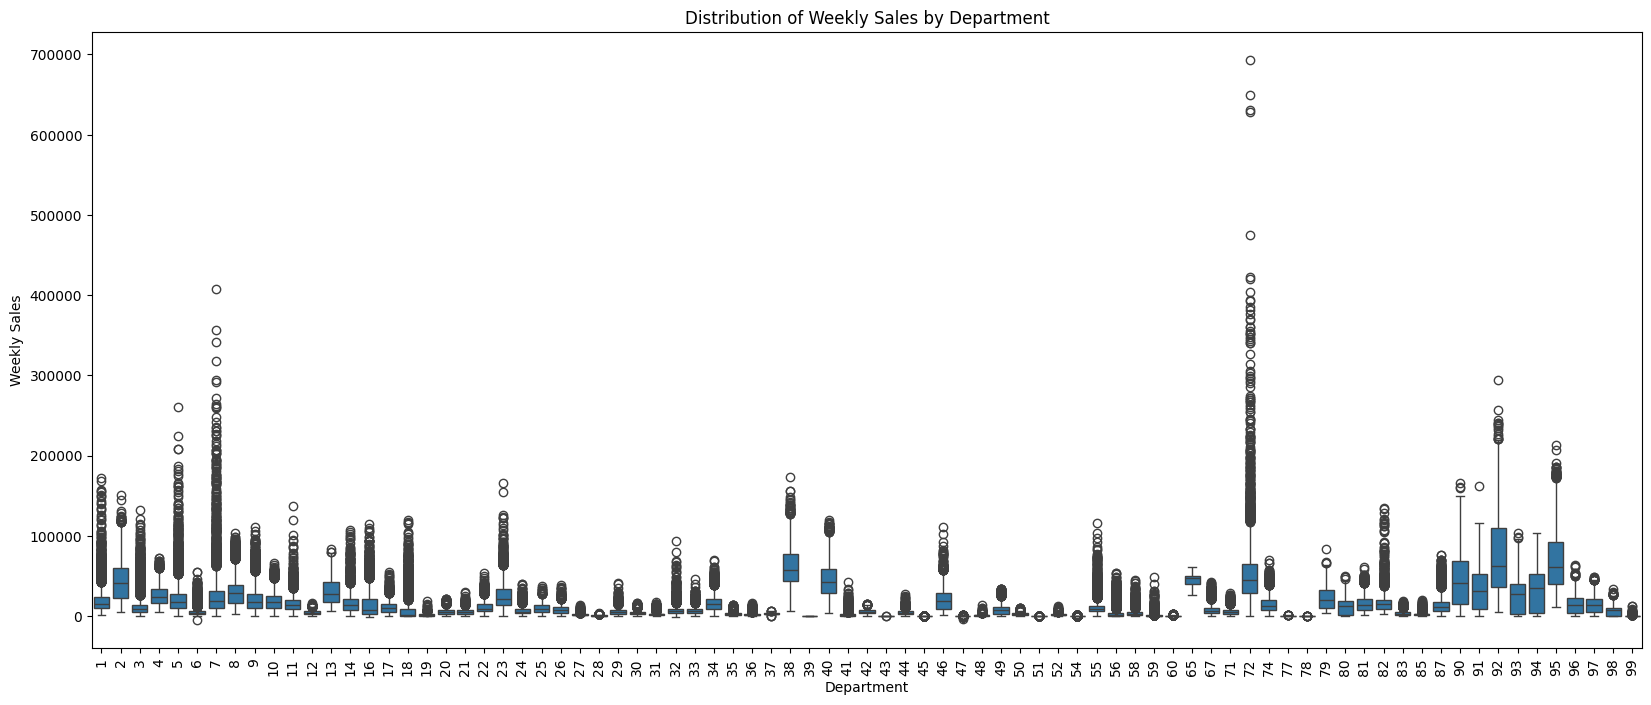

In [13]:
plt.figure(figsize = (20, 8))
sns.boxplot(x = 'Dept', y = 'Weekly_Sales', data = final_df)
plt.title('Distribution of Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.savefig('dept_sales_distribution.png')
plt.show()

/tmp/ipython-input-4005306752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsHoliday', y='Weekly_Sales', data=avg_holiday_sales, palette='viridis')


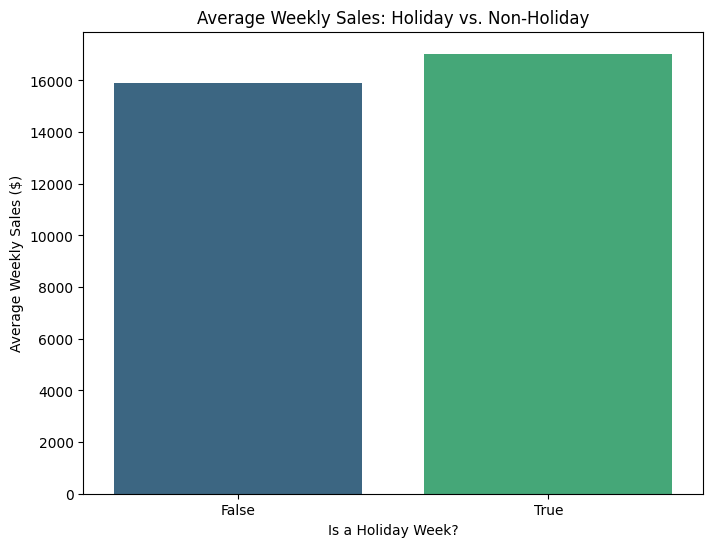

In [14]:
# Sales Comparison: Holiday vs. Non-Holiday
avg_holiday_sales = final_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=avg_holiday_sales, palette='viridis')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('Is a Holiday Week?')
plt.ylabel('Average Weekly Sales ($)')
plt.savefig('holiday_sales_comparison.png')
plt.show()

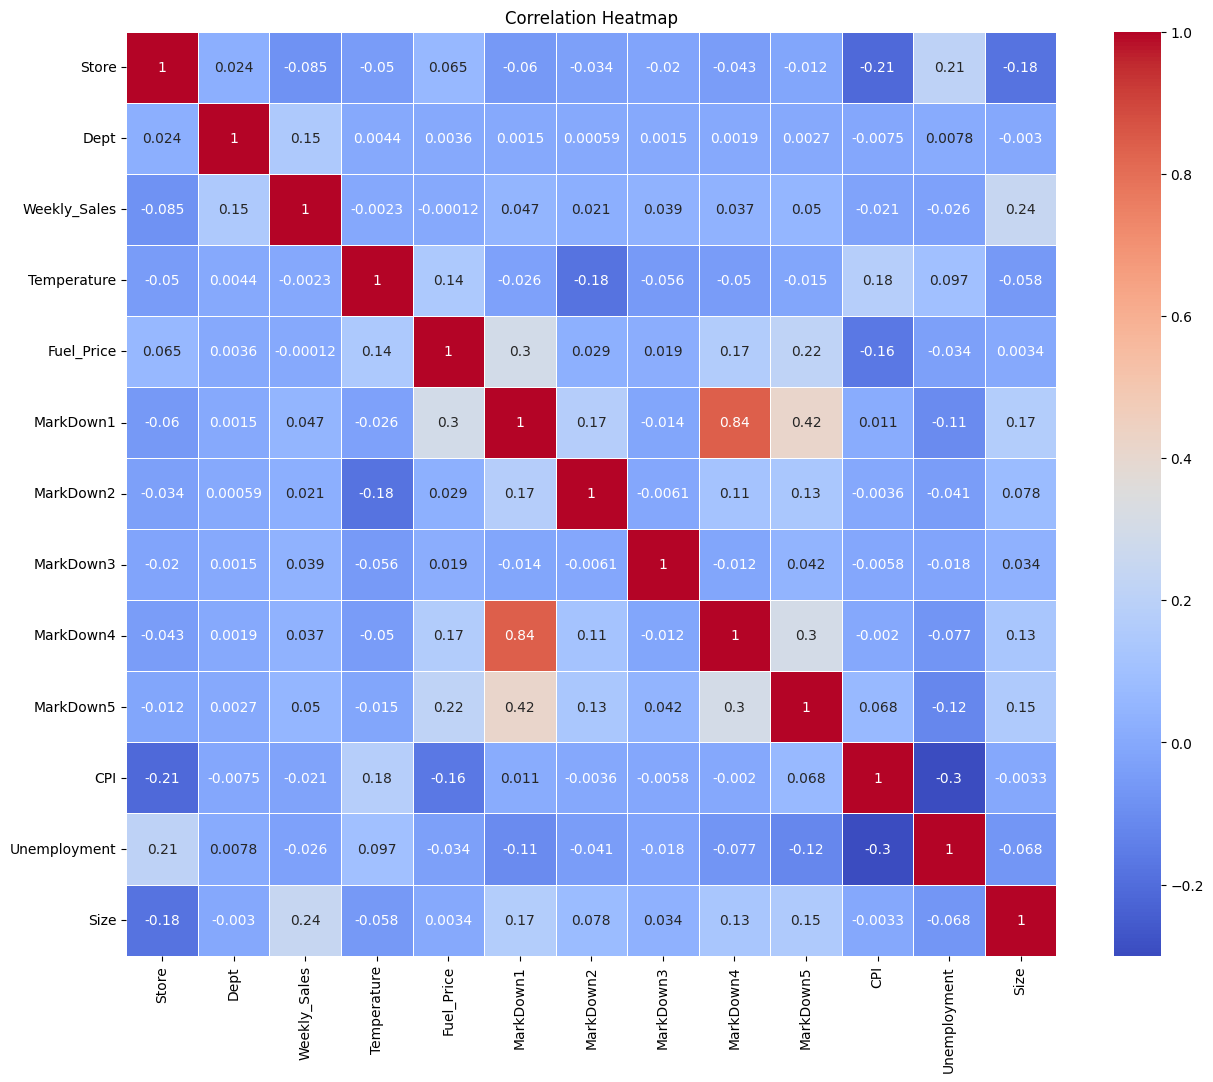

In [15]:
# Correlation Heatmap

numeric_columns = final_df.select_dtypes(include=['number']).columns
correlation_matrix = final_df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

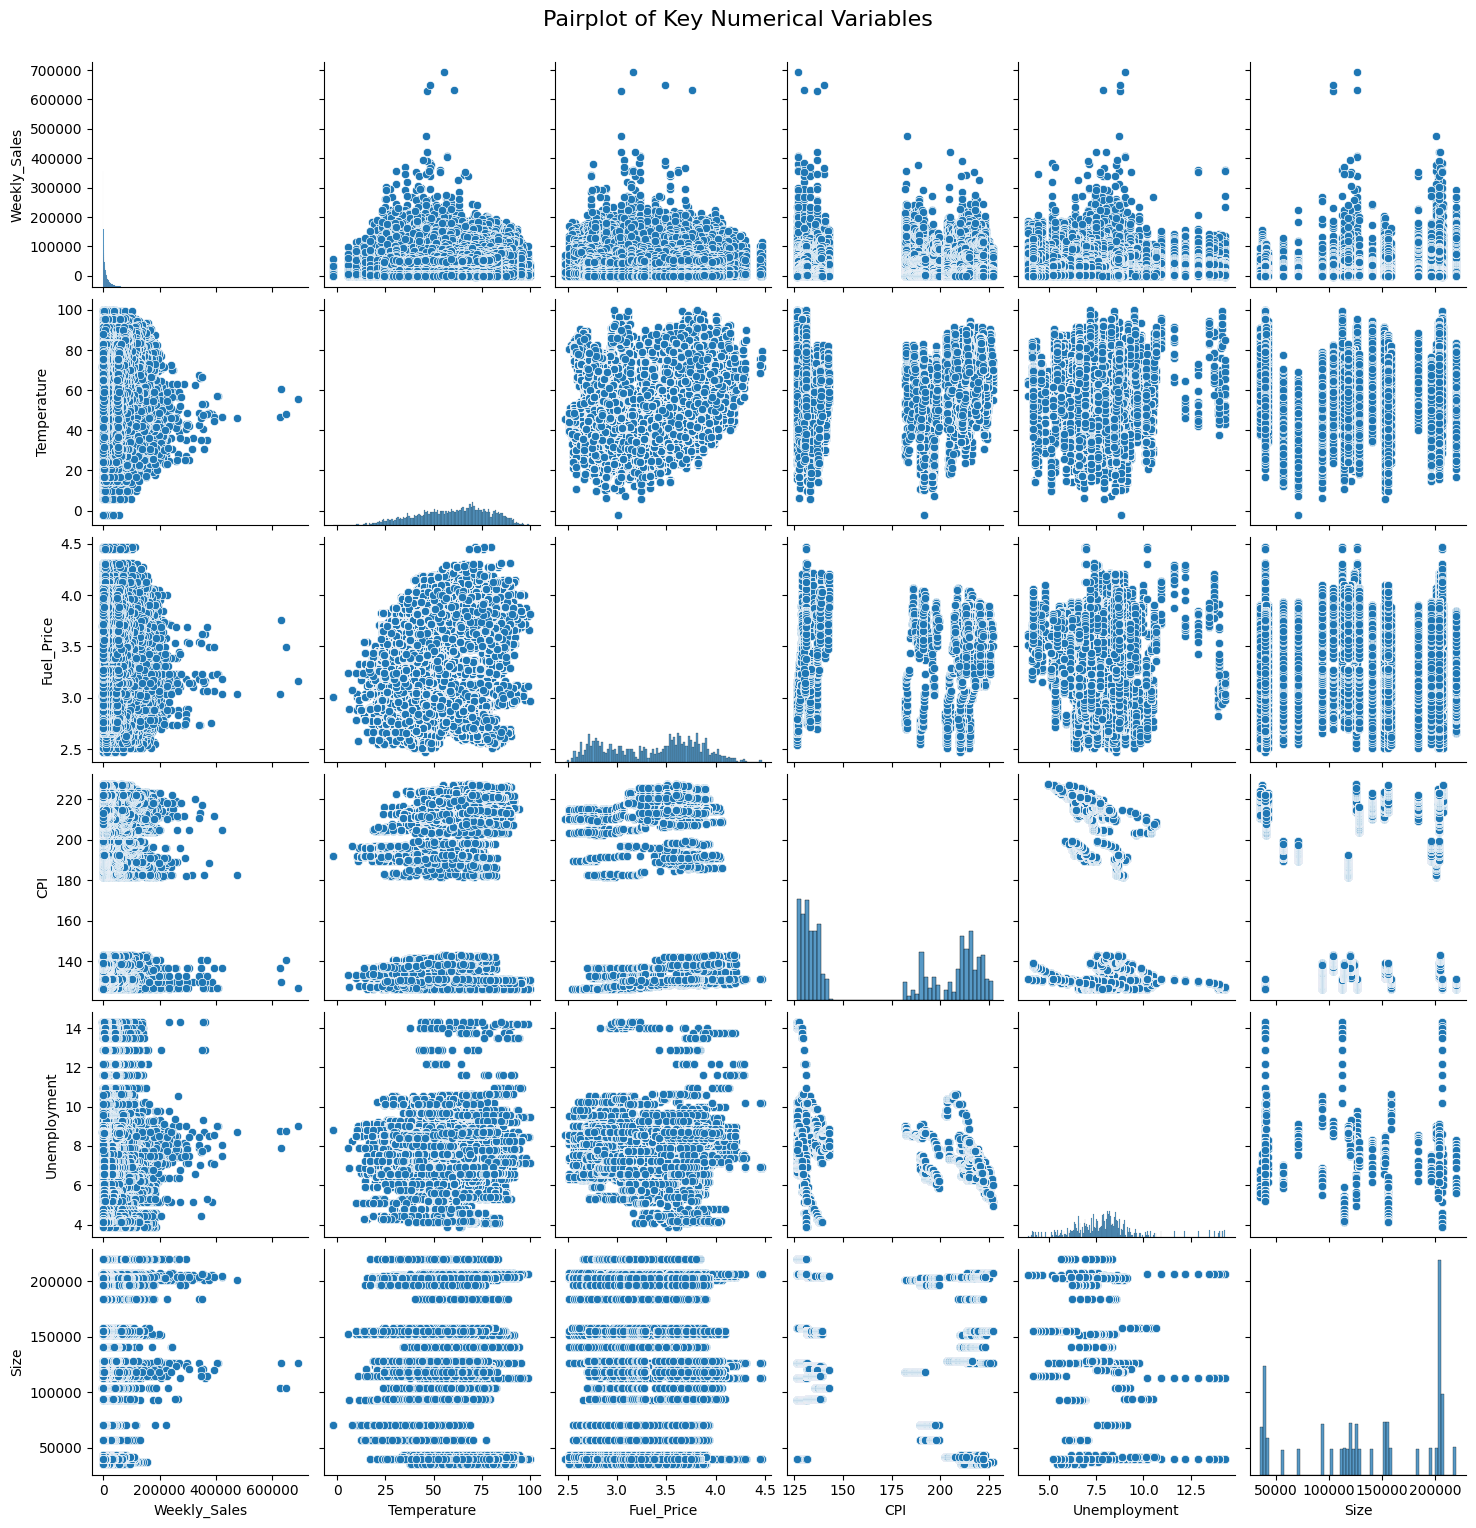

In [16]:
# 3. Pairplot
plot_data = final_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']]

sns.pairplot(plot_data)
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02, fontsize=16)
plt.savefig('pairplot.png')
plt.show()

**Data Processing**

In [17]:
# Convert Date to Features

final_df["Year"] = final_df["Date"].dt.year
final_df["Month"] = final_df["Date"].dt.month
final_df["Week"] = final_df["Date"].dt.isocalendar().week.astype(int)
final_df["DayOfWeek"] = final_df["Date"].dt.dayofweek
final_df["Quarter"] = final_df["Date"].dt.quarter

In [18]:
# Encoding Categorical Variables
final_df = pd.get_dummies(final_df, columns= ['Type', 'IsHoliday'], drop_first = True)

In [19]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["Size","Temperature","Fuel_Price","CPI","Unemployment"]
final_df[numeric_cols] = scaler.fit_transform(final_df[numeric_cols])


In [20]:
# Feature Selection

feature_cols = ["Store","Dept","Size","Temperature","Fuel_Price",
                "CPI","Unemployment","IsHoliday_True",
                "Year","Month","Week","DayOfWeek","Quarter"]

X = final_df[feature_cols]
y = final_df["Weekly_Sales"]

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

In [22]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 14556.635711118808
Linear Regression MSE: 475938584.9138657
Linear Regression RMSE: 21816.01670594029


In [23]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)


Random Forest MAE: 1435.9278813945489
Random Forest MSE: 13286582.097967021
Random Forest RMSE: 3645.076418673142


**Actual vs Predicted**

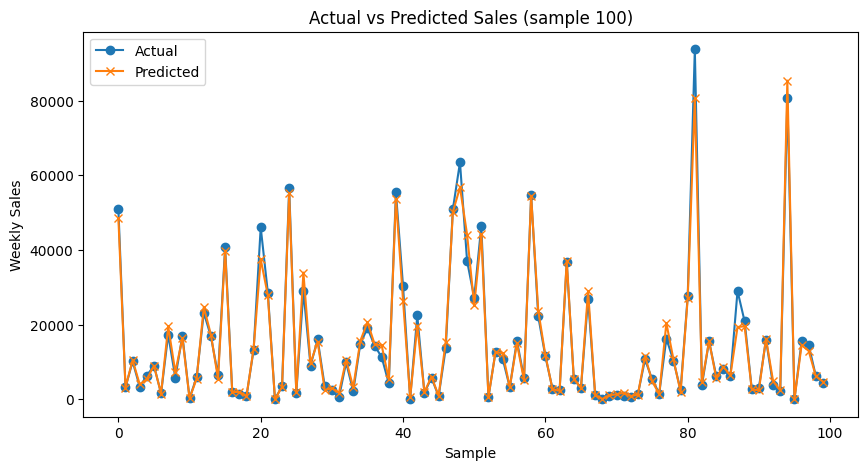

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", marker="o")   # first 100 points for readability
plt.plot(y_pred_rf[:100], label="Predicted", marker="x")
plt.title("Actual vs Predicted Sales (sample 100)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


**Feature Importance**

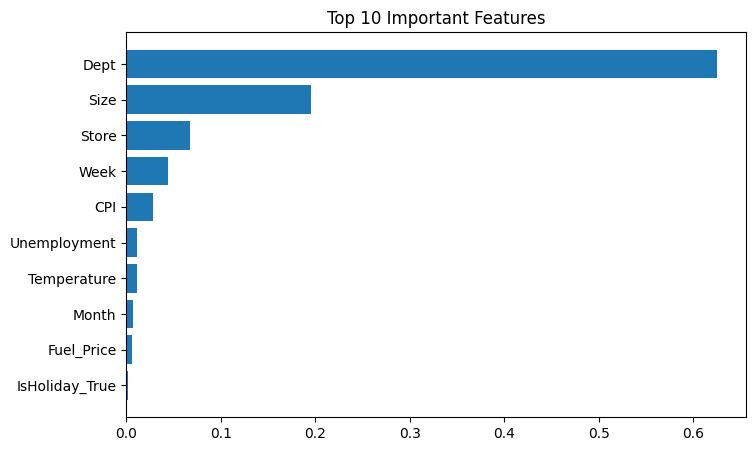

In [25]:

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 10 Important Features")
plt.savefig('feature_importance.png')
plt.show()


**Error Analysis**

In [26]:
results = X_test.copy()
results["Actual"] = y_test
results["Predicted"] = y_pred_rf
results["Error"] = results["Actual"] - results["Predicted"]

# Show biggest errors
print(results.sort_values(by="Error", key=abs).head(10))


        Store  Dept      Size  Temperature  Fuel_Price       CPI  \
293699     30    99 -1.537211     1.215311   -0.229058  1.286025   
259065     27    18  1.106191     1.163814   -0.953137 -0.887792   
219121     23    18 -0.363967     0.262899   -1.099261 -0.991774   
283004     29    51 -0.706618    -0.197858    0.593163 -0.886890   
408051     44    32 -1.587686     0.055288    0.931211 -1.027669   
256721     26    99  0.258855    -0.817982    1.563689 -0.936882   
75710       8    59  0.300917    -0.745887    0.423048  1.352912   
322973     34    19  0.350704    -1.376311   -1.382786 -1.135636   
248463     26    11  0.258855     0.295423    1.044621 -0.843128   
356384     38    23 -1.591294     0.352340    1.762157 -1.075769   

        Unemployment  IsHoliday_True  Year  Month  Week  DayOfWeek  Quarter  \
293699     -0.748829           False  2012      7    28          4        3   
259065      0.011652           False  2010      7    29          4        3   
219121     -1.

**Save model**

In [27]:
import joblib

joblib.dump(rf, "rf_sales_model.joblib")
print("Saved rf_sales_model.joblib")

Saved rf_sales_model.joblib


In [28]:
feature_cols = X_train.columns.tolist()   # make sure X_train exists
import json
with open("feature_cols.json","w") as f:
    json.dump(feature_cols, f)
print("Saved feature_cols.json")

Saved feature_cols.json


**Simple forecasting function**

In [29]:
import pandas as pd, numpy as np
import joblib, json

rf = joblib.load("rf_sales_model.joblib")
with open("feature_cols.json") as f:
    feature_cols = json.load(f)

def prepare_row_for_forecast(row):
    df = pd.DataFrame([row])
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["Quarter"] = df["Date"].dt.quarter
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0
    df = df[feature_cols]
    return df

# Example usage:
row = {"Store": 1, "Dept": 20, "Size": 1500, "Temperature": 50, "Fuel_Price": 2.5,
       "CPI": 210.0, "Unemployment": 6.0, "IsHoliday": 0, "Date":"2012-10-02"}
X_pred = prepare_row_for_forecast(row)
pred_sales = rf.predict(X_pred)[0]
print("Predicted Weekly Sales:", pred_sales)


Predicted Weekly Sales: 6398.5055999999995


**Anomaly detection** (residual-based)

In [30]:
results = X_test.copy().reset_index(drop=True)
results["Actual"] = y_test.reset_index(drop=True)
results["Predicted"] = y_pred_rf
results["Resid"] = results["Actual"] - results["Predicted"]
rmse = np.sqrt(mean_squared_error(results["Actual"], results["Predicted"]))
print("RMSE on this set:", rmse)

threshold = 2 * rmse
results["Anomaly_RMSE"] = (results["Resid"].abs() > threshold).astype(int)
print("Anomalies by RMSE threshold:", results["Anomaly_RMSE"].sum())

results["Resid_zscore"] = (results["Resid"] - results["Resid"].mean()) / results["Resid"].std()
results["Anomaly_Z"] = (results["Resid_zscore"].abs() > 3).astype(int)
print("Anomalies by z-score:", results["Anomaly_Z"].sum())

# Export anomalies for the report
anomalies = results[(results["Anomaly_RMSE"]==1) | (results["Anomaly_Z"]==1)]
anomalies.to_csv("detected_anomalies.csv", index=False)
print("Saved detected_anomalies.csv")


RMSE on this set: 3645.076418673142
Anomalies by RMSE threshold: 2770
Anomalies by z-score: 1341
Saved detected_anomalies.csv


**Visualization: Actual vs Predicted over time**

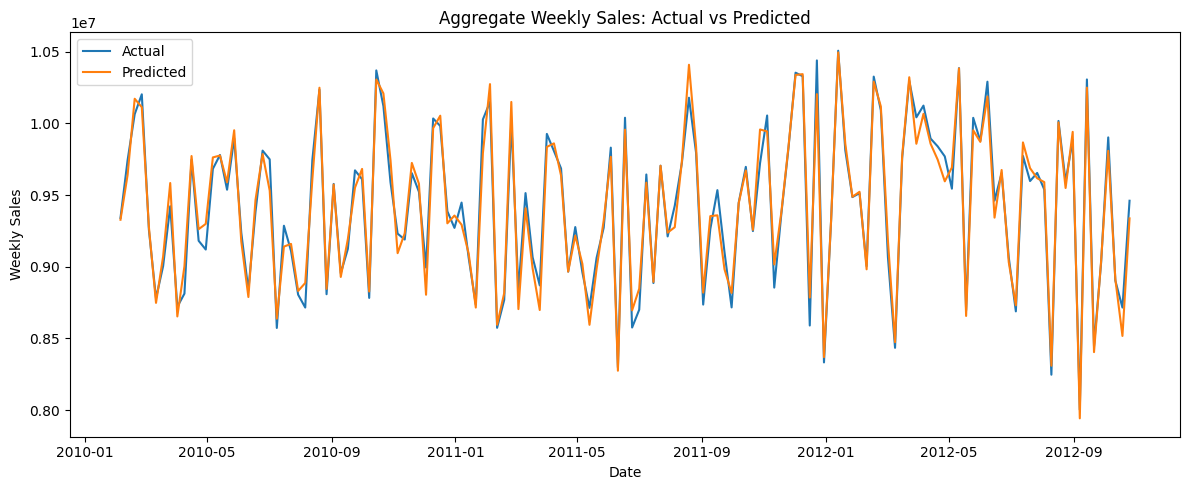

Saved actual_vs_predicted_aggregate.png


In [31]:
results_plot = results.copy()
results_plot['Date'] = final_df.loc[results_plot.index, 'Date']

agg = results_plot.groupby("Date")[["Actual","Predicted"]].sum().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(agg["Date"], agg["Actual"], label="Actual")
plt.plot(agg["Date"], agg["Predicted"], label="Predicted")
plt.title("Aggregate Weekly Sales: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.savefig("actual_vs_predicted_aggregate.png")
plt.show()
print("Saved actual_vs_predicted_aggregate.png")

**Segmentation analysis (store clusters)**

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create store-level summary
store_summary = final_df.groupby("Store").agg({
    "Weekly_Sales": ["mean","sum"],
    "Size": "mean"
}).reset_index()
store_summary.columns = ["Store","AvgWeeklySales","TotalSales","AvgSize"]

# Optionally add department diversity: count of departments with >0 sales
dept_counts = final_df[final_df["Weekly_Sales"]>0].groupby("Store")["Dept"].nunique().reset_index().rename(columns={"Dept":"NumDepts"})
store_summary = store_summary.merge(dept_counts, on="Store", how="left").fillna(0)

# Scale and cluster
scaler = StandardScaler()
X_seg = scaler.fit_transform(store_summary[["AvgWeeklySales","AvgSize","NumDepts"]])
kmeans = KMeans(n_clusters=4, random_state=42)
store_summary["Segment"] = kmeans.fit_predict(X_seg)

# Brief segment sizes
print(store_summary.groupby("Segment").agg({
    "Store":"count",
    "AvgWeeklySales":"mean",
    "AvgSize":"mean",
    "NumDepts":"mean"
}).rename(columns={"Store":"NumStores"}))

store_summary.to_csv("store_segments.csv", index=False)
print("Saved store_segments.csv")


         NumStores  AvgWeeklySales   AvgSize   NumDepts
Segment                                                
0               18    12372.197001 -0.290486  76.055556
1               10    19595.697056  0.975995  77.000000
2                7    27552.408430  0.951200  77.857143
3               10     8319.076167 -1.594218  63.900000
Saved store_segments.csv


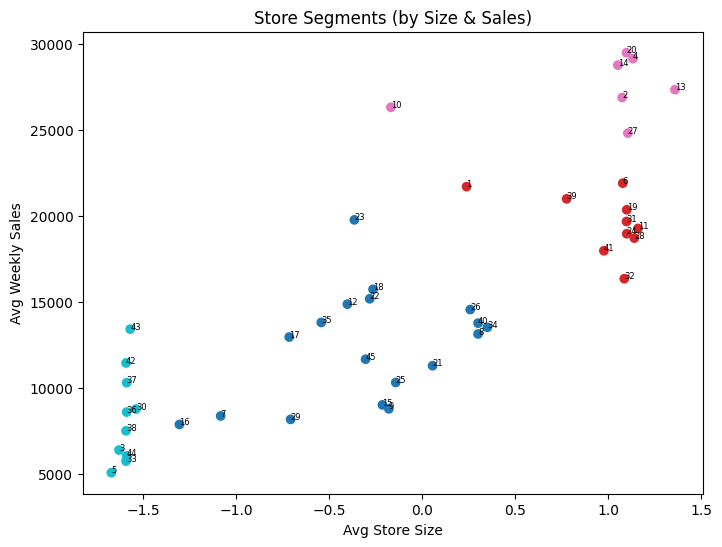

Saved store_segments_plot.png


In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(store_summary["AvgSize"], store_summary["AvgWeeklySales"], c=store_summary["Segment"], cmap="tab10")
plt.xlabel("Avg Store Size")
plt.ylabel("Avg Weekly Sales")
plt.title("Store Segments (by Size & Sales)")
for i,row in store_summary.iterrows():
    plt.text(row["AvgSize"], row["AvgWeeklySales"], str(int(row["Store"])), fontsize=6)
plt.savefig("store_segments_plot.png")
plt.show()
print("Saved store_segments_plot.png")


**Top Departments that frequently sell together**

In [34]:
# Create transactions (Store + Date = one "basket")
trans = final_df.groupby(["Store","Date"])["Dept"].apply(list)

# Count dept co-occurrences (simplified version)
from collections import Counter
pairs = Counter()

for basket in trans:
    unique_depts = set(basket)
    for d1 in unique_depts:
        for d2 in unique_depts:
            if d1 < d2:  # avoid duplicates
                pairs[(d1,d2)] += 1

# Top 10 frequent dept pairs
top_pairs = pairs.most_common(10)
print("Top department pairs that sell together:")
for p, count in top_pairs:
    print(p, "->", count, "weeks together")


Top department pairs that sell together:
(1, 2) -> 6435 weeks together
(1, 3) -> 6435 weeks together
(1, 4) -> 6435 weeks together
(1, 7) -> 6435 weeks together
(1, 8) -> 6435 weeks together
(1, 10) -> 6435 weeks together
(1, 13) -> 6435 weeks together
(1, 14) -> 6435 weeks together
(1, 16) -> 6435 weeks together
(1, 21) -> 6435 weeks together


✅ **Conclusion**

This project successfully demonstrated how integrated retail data can be used to generate actionable insights for store optimization. Through data analysis and visualization, important sales patterns such as seasonality and holiday effects were identified. Predictive modeling with Random Forest provided reliable sales forecasts and enabled anomaly detection to flag unusual sales weeks. Store segmentation revealed distinct performance groups, supporting differentiated business strategies, while department co-occurrence analysis highlighted opportunities for cross-selling and promotions.

Overall, the findings provide a data-driven foundation for improving inventory management, tailoring marketing campaigns, and enhancing operational efficiency across stores.